## Data preparation

In [86]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

In [87]:
train_df = pd.read_csv('internship_train.csv')

In [88]:
# First look at the data
train_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


Make sure there are no missing values in the data

In [89]:
train_df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        0
40        0
41        0
42        0
43        0
44        0
45        0
46        0
47        0
48        0
49        0
50        0
51        0
52        0
target    0
dtype: int64

Let's look at the standard deviation and variance

In [90]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,...,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,...,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,...,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,...,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,...,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,...,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,...,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,9.949874,0.999987,1.000000,499.000000,...,14.999900,14.999528,14.999733,14.999478,14.999869,14.999928,14.999948,14.999364,14.999775,99.999482


Number of unique values in columns

In [91]:
train_df.nunique() 

0           500
1           500
2           500
3           500
4           500
5           500
6           199
7         90000
8             2
9           500
10          500
11          500
12          500
13        90000
14        90000
15        90000
16        90000
17        90000
18        90000
19        90000
20        90000
21        90000
22        90000
23        90000
24        90000
25        90000
26        90000
27        90000
28        90000
29        90000
30        90000
31        90000
32        90000
33        90000
34        90000
35        90000
36        90000
37        90000
38        90000
39        90000
40        90000
41        90000
42        90000
43        90000
44        90000
45        90000
46        90000
47        90000
48        90000
49        90000
50        90000
51        90000
52        90000
target    90000
dtype: int64

Column '8' contains two unique values. Most likely these are categories

In [92]:
train_df['8'][:5]

0    0
1    1
2    1
3    1
4    1
Name: 8, dtype: int64

Check the data types of each column

In [93]:
train_df.dtypes

0           int64
1           int64
2           int64
3           int64
4           int64
5           int64
6         float64
7         float64
8           int64
9           int64
10          int64
11          int64
12          int64
13        float64
14        float64
15        float64
16        float64
17        float64
18        float64
19        float64
20        float64
21        float64
22        float64
23        float64
24        float64
25        float64
26        float64
27        float64
28        float64
29        float64
30        float64
31        float64
32        float64
33        float64
34        float64
35        float64
36        float64
37        float64
38        float64
39        float64
40        float64
41        float64
42        float64
43        float64
44        float64
45        float64
46        float64
47        float64
48        float64
49        float64
50        float64
51        float64
52        float64
target    float64
dtype: object

All values are in numeric format. There is no need to process categorical attributes

Let's look at the correlation

In [94]:
corr_matrix = train_df.corr()
corr_matrix['target']

0         0.002427
1        -0.005545
2         0.001003
3         0.002807
4        -0.001300
5        -0.002125
6         0.000666
7         0.012103
8         0.000347
9         0.001504
10        0.003396
11       -0.001566
12        0.002016
13       -0.001009
14       -0.000513
15        0.001653
16       -0.000853
17        0.002953
18        0.001197
19        0.001520
20       -0.000456
21        0.002874
22        0.000304
23        0.001280
24        0.001070
25        0.004276
26        0.006370
27       -0.001459
28        0.003451
29       -0.004785
30       -0.000964
31        0.005077
32        0.000561
33       -0.002301
34        0.001331
35       -0.006267
36        0.002624
37        0.001642
38       -0.003845
39        0.006283
40       -0.007216
41       -0.003770
42       -0.002876
43        0.000489
44        0.003092
45       -0.000903
46        0.001160
47        0.000319
48       -0.001183
49        0.002473
50       -0.005243
51       -0.004507
52       -0.

Several attributes show low correlation compared to other attributes. Let's look at the results of the trained model and possibly remove these attributes later

Split the data into X and y

In [95]:
y = train_df['target']
train_df.drop(['target'], axis=1, inplace=True)

X = train_df.copy()

Form the training and test sets

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

## Normalization

The model that will be trained is RandomForestRegressor. This means that normalizing the data is not necessary

In [47]:
# from sklearn.preprocessing import MinMaxScaler
# import numpy as np

# scaler = MinMaxScaler()

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# y_train = np.array(y_train)

## Model training and initialization 
Models were compared using Orange Data Mining. RandomForest showed the best RMSE

In [48]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

We will evaluate the model using RMSE

In [50]:
from sklearn.metrics import mean_squared_error

pred = forest.predict(X_test)
mean_squared_error(y_test, pred, squared=False)

0.0038279200852112017

We will evaluate feature importance

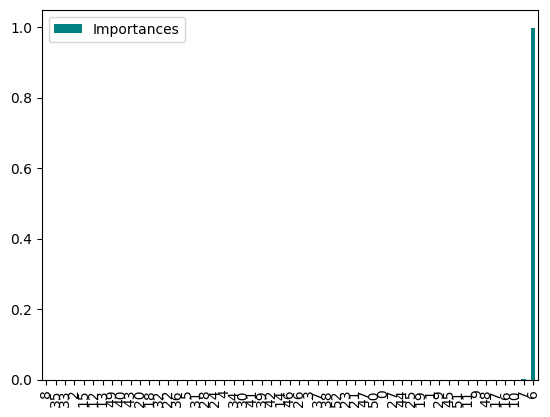

In [51]:
feature_importances(forest)

In [52]:
def feature_importances(model):
    importances = model.feature_importances_
    
    df = pd.DataFrame({"Features" : train_df.columns, "Importances" : importances})
    df.set_index('Importances')
    
    df = df.sort_values('Importances')
    
    df.plot.bar(color = 'teal')



The features are sorted in order of importance. The most informative features were found to be 6 and 7. When evaluating correlation, feature 6 showed low correlation. If we had removed it before training and evaluating the model, the model would have performed much worse on the test data

We will keep only the most informative features and train the model.

In [97]:
X = train_df[['6', '7']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [55]:
forest_imp = RandomForestRegressor(n_estimators=100, random_state=0)
forest_imp.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [56]:
pred = forest_imp.predict(X_test)
mean_squared_error(y_test, pred, squared=False)

0.0016033823281488468

The model trained on all features showed RMSE = 0.0038
The model trained only on the most informative features showed RMSE = 0.0016

We use RandomizedSearchCV to find the best value for the number of trees in the random forest. Among the numbers from 50 to 250, the model with n_estimators = 250 showed the best result. We will check if the model works better by increasing n_estimators to 500.

In [79]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in range(250, 500, 100)]

random_grid = {'n_estimators': n_estimators}


In [80]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid)
rf_random.fit(X_train, y_train)

c:\python38\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'n_estimators': [250, 350, 450]})

In [81]:
rf_random.best_params_

{'n_estimators': 450}

The RandomizedSearchCV can be used to continue tuning hyperparameters, but the search can be time-consuming, so we will stick with n_estimators = 450.
## Let's train the model with the best parameter.

In [99]:
forest_imp_450 = RandomForestRegressor(n_estimators=450, random_state=0)
forest_imp_450.fit(X_train, y_train)

RandomForestRegressor(n_estimators=450, random_state=0)

In [100]:
pred = forest_imp_450.predict(X_test)
mean_squared_error(y_test, pred, squared=False)

0.0015850942921462317

## Testing

In [101]:
test_df = pd.read_csv('internship_hidden_test.csv')

In [102]:
X_test = test_df[['6', '7']]

In [103]:
pred = forest_imp_450.predict(X_test)

Let's save the result to a file.

In [104]:
output = pd.DataFrame({'id': X_test.index,
                       'target': pred})
output.to_csv('model_predictions.csv', index=False)